<a href="https://colab.research.google.com/github/PTIch06/YasynskyiColab/blob/main/Lab4_Yasynskyi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Лабораторна робота №4
##з дисципліни "Нейронні мережі"
###студента групи КН-31/2
###Ясинського Дениса
###Варіант №11

1. На основі документу вирішити завдання класифікації для набору даних Fashion MNIST.
2. Для моделювання використати 3 класи індекси яких взяти відповідно до номеру у списку групи.
3. Моделювання провести із використанням нейронної мережі (Flatten & Dense layers).
4. Здійснити вибір оптимального кроку градієнтного алгоритму (learning_rate), а також побудову Confusion Matrix.


In [13]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

Завдання 1

In [16]:
print(len(train_data), len(test_data))

60000 10000


Завдання 2

In [22]:
import numpy as np

class_names = ['T-shirt','HeeledShoes', 'Sandal']

new_train_data = []
new_train_labels = []
new_test_data = []
new_test_labels = []

for i in range(len(train_labels)):
  if (train_labels[i]==0 or train_labels[i]==5 or train_labels[i]==7 ):
    new_train_data.append(train_data[i])
    new_train_labels.append(train_labels[i])
for i in range(len(test_labels)):
  if (test_labels[i]==0 or test_labels[i]==5 or test_labels[i]==7 ):
    new_test_data.append(test_data[i])
    new_test_labels.append(test_labels[i])

print(len(new_train_data), len(new_test_data))

print(new_train_data[0][5])

new_train_labels = np.array(new_train_labels)
new_test_labels = np.array(new_test_labels)
new_train_data = np.array(new_train_data) / 255.0
new_test_data = np.array(new_test_data) / 255.0

print(new_train_data[0][5])

18000 3000
[  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51
  63 113 222 202 206 220 224   0   0   0]
[0.         0.         0.         0.         0.45490196 0.88627451
 0.80784314 0.8        0.81176471 0.8        0.39607843 0.29411765
 0.18431373 0.28627451 0.18823529 0.19607843 0.17647059 0.2
 0.24705882 0.44313725 0.87058824 0.79215686 0.80784314 0.8627451
 0.87843137 0.         0.         0.        ]


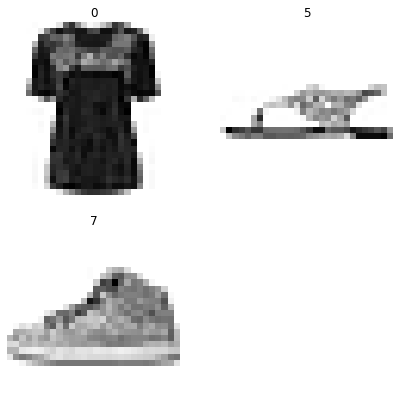

In [43]:
import matplotlib.pyplot as plt
import random
plt.figure(figsize=(7, 7))
for i in range(3):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(new_train_data)))
  plt.imshow(new_train_data[rand_index], cmap=plt.cm.binary)
  plt.title(new_train_labels[rand_index])
  plt.axis(False)

Завдання 3

In [45]:
tf.random.set_seed(42)


model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") 
])


model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 *10**(epoch/20))

find_lr_history = model.fit(new_train_data,
                    new_train_labels,
                    epochs=40,
                    validation_data=(new_test_data, new_test_labels),
                    callbacks=[lr_scheduler])

Epoch 1/40
563/563 [==============================] - 2s 2ms/step - loss: 0.3836 - accuracy: 0.8870 - val_loss: 0.1261 - val_accuracy: 0.9603 - lr: 0.0010
Epoch 2/40
563/563 [==============================] - 1s 2ms/step - loss: 0.1068 - accuracy: 0.9657 - val_loss: 0.0901 - val_accuracy: 0.9673 - lr: 0.0011
Epoch 3/40
563/563 [==============================] - 1s 2ms/step - loss: 0.0865 - accuracy: 0.9721 - val_loss: 0.0901 - val_accuracy: 0.9650 - lr: 0.0013
Epoch 4/40
563/563 [==============================] - 1s 3ms/step - loss: 0.0773 - accuracy: 0.9736 - val_loss: 0.0835 - val_accuracy: 0.9703 - lr: 0.0014
Epoch 5/40
563/563 [==============================] - 2s 3ms/step - loss: 0.0718 - accuracy: 0.9744 - val_loss: 0.0954 - val_accuracy: 0.9640 - lr: 0.0016
Epoch 6/40
563/563 [==============================] - 1s 2ms/step - loss: 0.0711 - accuracy: 0.9756 - val_loss: 0.0724 - val_accuracy: 0.9710 - lr: 0.0018
Epoch 7/40
563/563 [==============================] - 1s 2ms/step - lo

Завдання 4

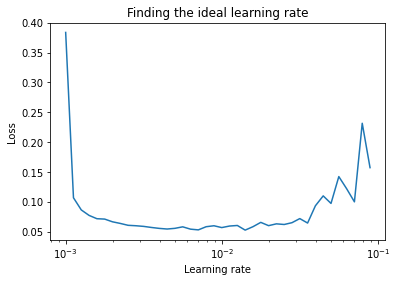

In [46]:
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) 
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

94/94 [==============================] - 0s 1ms/step - loss: 0.1326 - accuracy: 0.9533
Test accuracy: 0.95333331823349


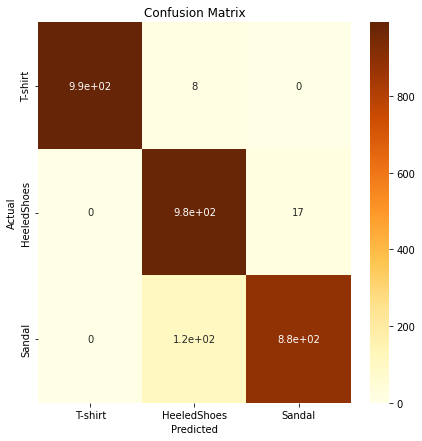

In [50]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns

test_loss, test_acc = model.evaluate(new_test_data, new_test_labels)
print('Test accuracy:', test_acc)

predictions = model.predict(new_test_data)
y_predictions = []
for i in predictions:
  i_max = np.argmax(i)
  y_predictions = np.append(y_predictions, i_max)


cm = confusion_matrix(new_test_labels, y_predictions)
dataframe_cm = pd.DataFrame(cm, index = class_names, columns = class_names)
plt.figure(figsize=(7,7))
sns.heatmap(dataframe_cm, annot=True, cmap="YlOrBr")
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()